### Task 1

(a) Load the dataset and construct a feature vector for each article in the entire dataset. You
need to report the number of articles, and the number of extracted features. Show 5 example
articles with their extracted features using a dataframe.

Length of data:  428
Number of features per example: 3
First 5 examples:
   ArticleId                                               Text       Category
0       1976  lifestyle governs mobile choice faster better ...           tech
1       1797  french honour director parker british film dir...  entertainment
2       1866  fockers fuel festive film chart comedy meet fo...  entertainment
3       1153  housewives lift channel 4 ratings debut us tel...  entertainment
4        342  u2 desire number one u2 three prestigious gram...  entertainment


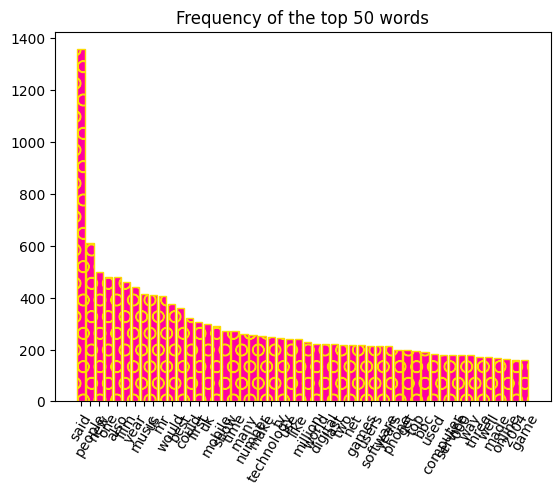

In [2]:
import csv
import matplotlib.pyplot as plt
import pandas as pd

def make_df():
    df = pd.read_csv("../train.csv")
    
    return df

def main():
    data = make_df()
    print("Length of data: ", len(data))
    print("Number of features per example:", len(data.columns))
    print("First 5 examples:")
    print(data.head())

    feature_analyse(data)

    words_dict, edu_dict, tech_dict, tech_edu = feature_analyse(data)

    # overall words top 50 plot
    top50_barplot(words_dict)

def feature_analyse(data):
    tech_dict = {}
    edu_dict = {}
    tech_edu = [0, 0]
    
    words_dict = {}
    for index, row in data.iterrows():
        words = row["Text"].split()
        category = row["Category"]

        if category == "tech":
            tech_edu[0] += 1

        else:
            tech_edu[1] += 1

        for word in words:

            if word not in tech_dict:
                tech_dict[word] = 1
            else:
                tech_dict[word] += 1

            if word not in edu_dict:
                edu_dict[word] = 1
            else:
                edu_dict[word] += 1
                    
            if word not in words_dict:
                words_dict[word] = 1
            else:
                words_dict[word] += 1


    return words_dict, edu_dict, tech_dict, tech_edu

def top50_barplot(words_dict):
    # list of words
    top_50_words = sorted(words_dict.items(), key = lambda item:item[1], reverse= True)[:50]

    # turning back into dict
    top_50_dict = dict(top_50_words)

    plt.figure()
    bars6 = plt.bar(top_50_dict.keys(), top_50_dict.values(), color = "#FF00A2", edgecolor = "#fcdb03")
    plt.xticks(rotation = 60)
    plt.title("Frequency of the top 50 words")

    pattenr = ["O"] * 50

    for bar, pattern in zip(bars6, pattenr):
        bar.set_hatch(pattern)
    
    plt.show()


main()

(b) Conduct term frequency analysis and report three plots: (i) top-50 term frequency distribution
across the entire dataset, (ii) term frequency distribution for respective class of articles, and (iii)
class distribution.

In [3]:
def main():
    data = make_df()
    print("Length of data: ", len(data))
    print("Number of features per example:", len(data.columns))
    print("First 5 examples:")
    print(data.head())

    feature_analyse(data)

    words_dict, edu_dict, tech_dict, tech_edu = feature_analyse(data)

    # overall words top 50 plot
    top50_barplot(words_dict)

    top50_per_class(edu_dict, tech_dict)

    class_dist(tech_edu)

# bar chart of frequency of words

def class_dist(tech_edu):
    fig, ax = plt.subplots()    
    
    ax.grid(True)
    ax.set_axisbelow(True)
    bars = ax.bar(["Tech",  "Education"], tech_edu, color = ["#0084FF", "#ff8c00"], edgecolor = ["#f3a200", "#6b2ed7"])
    ax.set_yticks(range(0,250, 20))
    ax.set_title("Class distribution")
    ax.set_xlabel("Classes")
    ax.set_ylabel("Count")

    patterns = ["*", "x"]

    for bar, pattern in zip(bars, patterns):
        bar.set_hatch(pattern)

    plt.show()

def top50_barplot(words_dict):
    # list of words
    top_50_words = sorted(words_dict.items(), key = lambda item:item[1], reverse= True)[:50]

    # turning back into dict
    top_50_dict = dict(top_50_words)

    plt.figure()
    bars6 = plt.bar(top_50_dict.keys(), top_50_dict.values(), color = "#FF00A2", edgecolor = "#fcdb03")
    plt.xticks(rotation = 60)
    plt.title("Frequency of the top 50 words")

    pattenr = ["O"] * 50

    for bar, pattern in zip(bars6, pattenr):
        bar.set_hatch(pattern)
    
    plt.show()

def top50_per_class(edu_dict, tech_dict):
    top_50_words_edu = sorted(edu_dict.items(), key = lambda item:item[1], reverse= True)[:50]

    # turning back into dict edu edition
    top_50_dict_edu = dict(top_50_words_edu)

    # tech dict
    top_50_words_tech = sorted(tech_dict.items(), key = lambda item:item[1], reverse= True)[:50]

    # turning back into dict
    top_50_dict_tech = dict(top_50_words_tech)

    fig, axes = plt.subplots(nrows = 1, ncols = 2)

    #edu plot
    bars0 = axes[0].bar(top_50_dict_edu.keys(), top_50_dict_edu.values(), color = "#91FF00", edgecolor = "#d106f3")
    axes[0].set_title("Education top 50 words")
    axes[0].tick_params(axis = 'x', rotation = 90)
    
    #tech plot
    bars1 = axes[1].bar(top_50_dict_tech.keys(), top_50_dict_tech.values(), color = "#FF0037", edgecolor = "#39be19")
    axes[1].set_title("Technology top 50 words")
    axes[1].tick_params(axis = 'x', rotation = 90)

    fig.tight_layout()

    patterns = ["*"] * 50

    for bar, pattern in zip(bars1, patterns):
        bar.set_hatch(pattern)

    patterns2 = ["o"] * 50
    
    for bar, pattern in zip(bars0, patterns2):
        bar.set_hatch(pattern)
        
    plt.show()

